<a href="https://colab.research.google.com/github/dinorahfariasc/cienciaDados-UFRN/blob/main/Estat%C3%ADsticaInferencial_parteIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula Estatística Inferencial (parte 4)

Vimos na aula passada como podemos realizar um teste de hipótese utilizando a abordagem do bootstrap. Neste notebook, mostrarei como podemos utilizar a abordagem matemática para realizar o teste de hipótese.

## Teste T de Student

O teste T de Student é um método de teste de hipótese utilizado para verificar diferenças entre médias quando não conhecemos a variância da população. Para isso, utiliza-se a distribuição T, que é gerada calculando, para várias amostras de mesmo tamanho e provenientes da mesma população, o valor t que possui a seguinte fórmula:
$$t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}}$$
Onde $\mu$ é a média da hipótese nula, $\bar{X}$ é a média da hipótese alternativa e $\frac{s}{\sqrt{n}}$ é o erro padrão amostral. A distribuição T possui média = 0 e o seu grau de liberdade corresponde a n - 1.

A distribuição T de Student possui este formato:

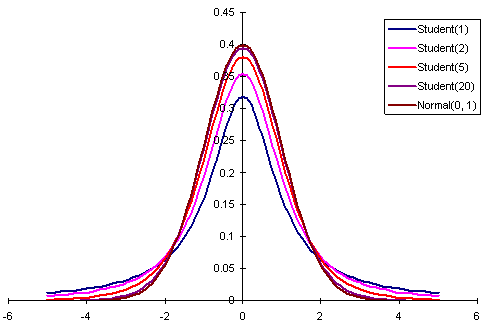

Fonte: https://ecstep.com/t-distribution/

### Como gerar uma distribuição T de Student?

A distribuição T de Student pode ser gerado a partir de um experimento de simulação.

In [1]:
import matplotlib.pylab as plt
from matplotlib import cm
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import random

%matplotlib inline
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)

Vamos simular uma população com os seguintes parâmetros:

In [10]:
m = 0 # média
s = 1 # desvio padrão
n = 20 # tamanho da amostra, 30 tamanho padrao
N = 10000 # número de replicações
ts = np.zeros(N)
for i in range(N):
  sample = stats.norm.rvs(loc=m, scale=s, size=n)
  ts[i] = (sample.mean() - m)/(sample.std(ddof=1)/n**0.5)



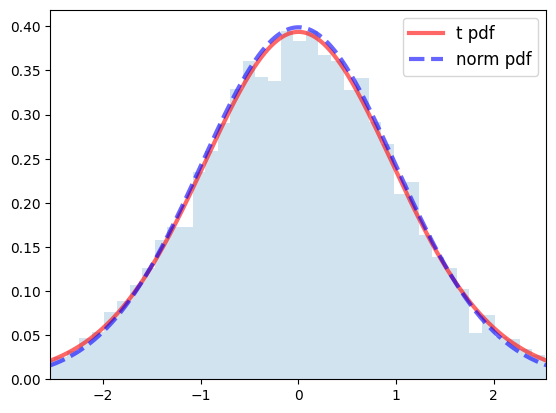

In [11]:
df = n-1
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.t.ppf(0.01, df),
                stats.t.ppf(0.99, df), 1000)
ax.plot(x, stats.t.pdf(x, df),
       'r-', lw=3, alpha=0.6, label='t pdf')
ax.plot(x, stats.norm.pdf(x),
       'b--', lw=3, alpha=0.6, label='norm pdf')
ax.hist(ts, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend()
plt.show()

Modifique o código acima realizando a simulação com populações com outros parâmetros. Que tipo de comportamento você verifica na distribuição da estatística T? E o que acontece se você modificar o tamanho da amostra?

### Testando diferença entre as médias

Para exemplificar o uso do teste T, vamos considerar como exemplo um estudo sobre diabetes mellitus.

É conhecido que o índice de glicemia na população em geral segue uma distribuição normal e que possui um valor médio de 85 mg/dL. Um pesquisador hipotetiza que a média do valor do índice glicêmico é diferente deste valor e coleta dados do índice glicêmico de 25 pessoas. Ele constatou que a média amostral foi de 92 mg/dL e um desvio padrão de 14 mg/dL. Vamos considerar o nível de significância como 5% em todos os exemplos.

Um dos testes que podemos realizar é verificar se a média estimada das amostras de 92 mg/dL pode ter vindo de uma população com média de 85 mg/dL. Para isso podemos formular as hipóteses da seguinte maneira:

$$H_0: \mu = 85 mg/dL$$
$$H_1: \mu \neq 85 mg/dL$$

Para esta hipótese alternativa, se existe diferença entre as médias, tanto faz se ela é para mais ou para menos de 85 mg/dL. Neste caso, estamos lidando com um teste bilateral, ou do inglês two-sided test. Quando o teste é bilateral, as regiões críticas de rejeição da hipótese nula se posicionam nas duas extremidades da distribuição.

Repare que no enunciado não foi fornecido dados a respeito do desvio padrão da população e que os valores do índice de glicemia segue uma distribuição normal. Neste caso, podemos calcular o valor T e verificar na distribuição T as chances dessa média amostral acontecer sob as condições da hipótese nula.
Vamos determinar primeiramente os pontos críticos considerando α = 0,05.

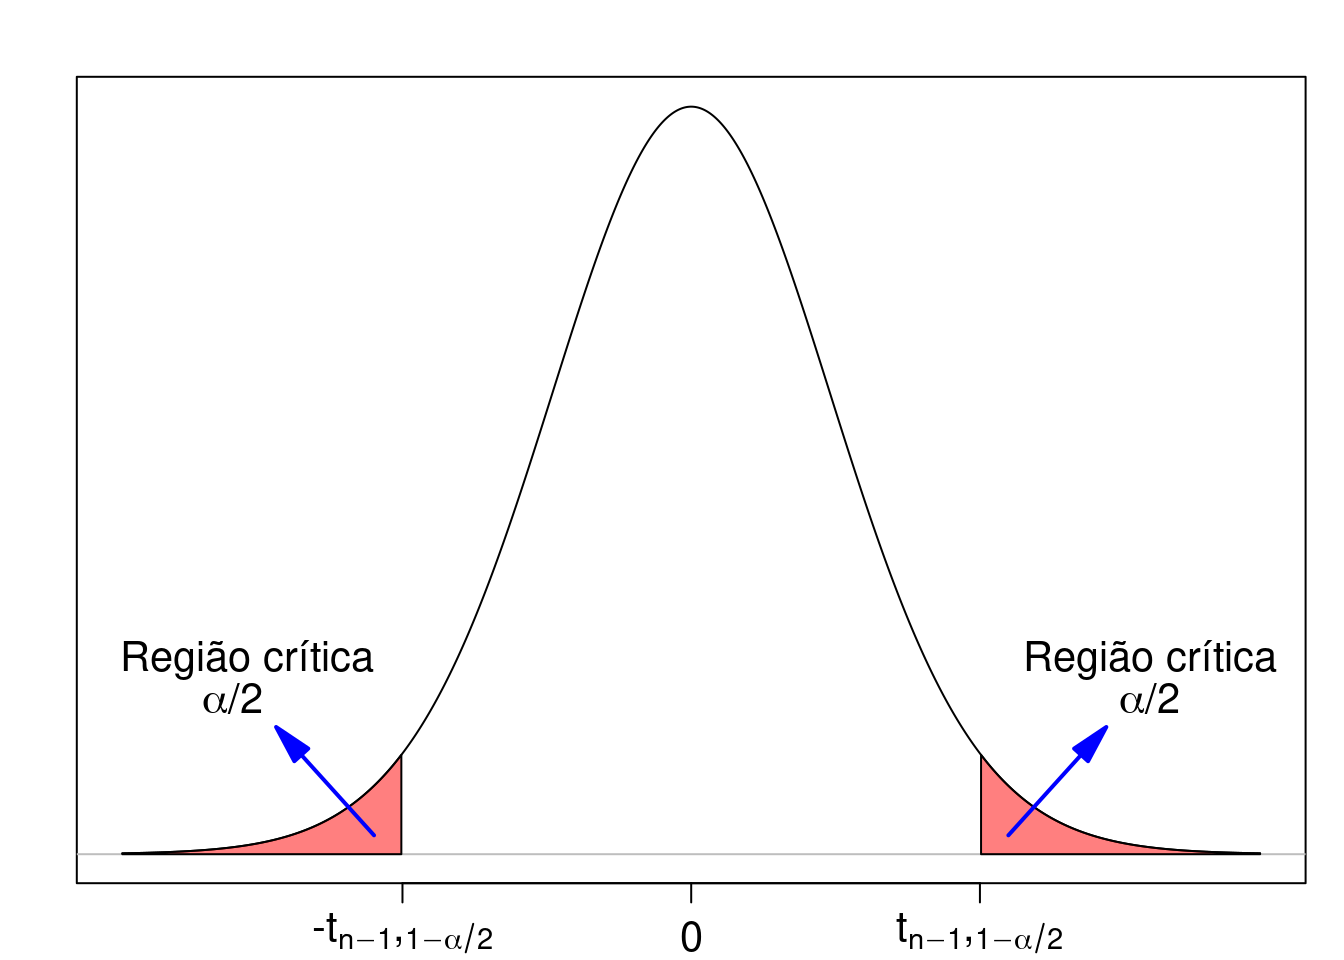

Fonte: https://www.lampada.uerj.br/arquivosdb/_book/testehipotese.html

In [12]:
# determine os parâmetros:

m =  85 # média da hipótese nula
ms =  92 # média da amostra
ss =  14 # desvio padrão da amostra
n =  25 # tamanho da amostra

In [13]:
# Determinando região crítica

stats.t.ppf([0.025, 0.975], n-1)

array([-2.06389856,  2.06389856])

Neste caso, as regiões críticas correspondem ao intervalo de $t < -2,063$ e $t > 2,063$.

Vamos agora determinar o valor T para a média da amostra:


In [14]:
se = ss/n**0.5
t = (ms - m)/se
t

2.5

O valor t para a média de 92 mg/dL foi de 2,5. Como 2,5 está dentro do intervalo da região crítica ($t > 2,063$), então rejeitamos a hipótese nula e concluímos que a média da população em estudo é diferente de 85 mg/dL.

Vamos calcular o **valor P**. Como estamos lidando com um teste bilateral, devemos considerar as duas extremidades da distribuição para o cálculo do valor P. Neste caso, ela corresponderá a área sob a curva do intervalo de t < -2.5 e t > 2.5.

Como a distribuição é simétrica, basta determinar a área sob a curva de um dos intervalos e multiplicar este valor por 2:


In [15]:
2*stats.t.cdf(-2.5,n-1)

0.019654175116578753

O valor P foi de 1,96%. Como o valor P é menor que o valor preestabelecido do α (5%), então rejeitamos a hipótese nula. É sempre mais conveniente apresentar o valor de p em um teste estatístico do que simplesmente dizer se ele é maior ou menor do que α, já que ele fornece uma noção para os leitores o quão provável ou improvável é a suposição da hipótese nula. Se o valor de p for pequeno, significa que os dados amostrais obtidos são muito improváveis de terem ocorrido se a hipótese nula fosse verdade.

Se você tiver o vetor com os valores de glicemia de cada pessoa amostrada, podemos utilizar a função ttest_1samp() do Scipy para fazer os cálculos:


In [16]:
d =[77.84800, 104.38499, 89.66422, 70.82953, 97.39830, 78.06084, 89.82995, 114.19175, 114.04906, 99.01672, 94.52712, 108.07911, 90.41670, 79.33025, 113.50642, 115.98638, 89.74412, 99.61077, 82.98740, 93.69422, 74.01227, 82.59638, 72.54827, 91.06590, 76.62135]

In [17]:
stats.ttest_1samp(d,           # Sample data
                  popmean = m, # Pop mean
                  alternative = "two-sided")  # tipo de teste (pode ser greater, less ou two-sided)

TtestResult(statistic=2.5000003433752767, pvalue=0.019654160093476626, df=24)

## Teste T para duas médias

O Teste T de Student pode ser modificado para verificar se médias amostrais de dois grupos pertencem ou não a mesma população. Neste caso, a hipótese nula corresponde a:

$H_0: \mu_1 = \mu_2 $

Que pode ser também ser escrito da seguinte maneira:

$H_0: \mu_1 - \mu_2 = 0 $

E a hipótese alternativa pode ser:

$H_1: \mu_1 \neq \mu_2$ (teste bilateral)

Ou

$H_1: \mu_1 > \mu_2$  (teste unilateral à direita)

Ou

$H_1: \mu_1 < \mu_2$ (teste unilateral à esquerda)

Dependendo do seu experimento, você pode lidar com situações onde as suas amostras são pareadas ou independentes.


### Amostras pareadas

Lidamos com amostras pareadas quando coletamos dados de uma variável, por exemplo o peso, em dois tempos distintos para cada indivíduo no experimento.

Consideremos os seguintes dados como exemplo:


In [18]:
data = pd.DataFrame()
data["pre"] = [5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770]
data["pos"] = [3910,4220,3885,5160,5645,4680,5265,5975,6790,6900,7335]
data

,pre,pos
0,5260,3910
1,5470,4220
2,5640,3885
3,6180,5160
4,6390,5645
5,6515,4680
6,6805,5265
7,7515,5975
8,7515,6790
9,8230,6900


In [ ]:
  pre post
1  5260 3910
2  5470 4220
3  5640 3885
4  6180 5160
5  6390 5645
6  6515 4680
7  6805 5265
8  7515 5975
9  7515 6790
10 8230 6900
11 8770 7335

O conjunto de dados intake contém dados da entrada de energia (kJ) em 11 pacientes antes (pre) e depois (post) da menstruação.

Como os dados são pareados, podemos analisar se existe uma diferença de médias entre as medidas antes e depois criando uma variável aleatória que consiste da diferença entre as medidas de antes e depois. Se esta variável segue uma distribuição normal, então podemos fazer um teste t para uma amostra, onde testamos se a nova variável X, onde X = X1 – X2, possui uma média μ igual a 0. X1 seria a medida antes da menstruação e X2 a medida depois da menstruação.
Considerando as minhas hipóteses ($\alpha = 0.05$):

$$H_0: \bar{X_1} - \bar{X_2}= 0 $$

$$H_1: \bar{X_1} - \bar{X_2} \neq 0 $$

A estatística t pode ser calculada da seguinte maneira:

$$t = \frac{\bar{X} - \mu}{\sqrt{\frac{s^2}{n}}} $$

Considerando X como a diferença X1 - X2 e que a média da hipótese nula ($\mu$) é zero, a estatística t pode ser reescrita da seguinte maneira:

$$t= \frac{\bar{X_1}- \bar{X_2}}{\sqrt{\frac{s^2}{n}}}$$

E seus valores seguirão uma distribuição t de Student com n - 1 graus de liberdade.

Em Python, podemos fazer este teste da seguinte maneira:

In [19]:
stats.ttest_rel(a = data.pre,
                b = data.pos)

TtestResult(statistic=11.941392877647603, pvalue=3.059020942934875e-07, df=10)

Como o valor P é menor que 0.05, então rejeitamos a hipótese nula e concluímos que a diferença entre as duas médias são diferentes de zero.

In [27]:
# Tente chegar nesses mesmos resultados gerado pela função sem usar a função

data["diff"] = (data.pre - data.pos)
t = data['diff'].mean()/(data['diff'].std(ddof=1)/len(data)**0.5)
t

11.941392877647603

### Amostras independentes
Dois grupos são considerados independentes, se os elementos presentes em cada um dos grupos representam indivíduos ou observações diferentes um do outro. Quando lidamos com grupos independentes, podemos ter as seguintes situações: a variância dos dois grupos são (1) iguais ou (2) são diferentes.

Para verificar se as duas amostras possuem a mesma variância, podemos realizar um outro teste estatístico, como a de Levene:

In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch04/ACCIDENTS_GU_BCN_2010.csv", encoding='latin-1')
#Create a new column which is the date
data['Date'] = data['Dia de mes'].apply(lambda x : str(x)) + '-' +  \
               data['Mes de any'].apply(lambda x : str(x))
data2 = data['Date']
counts2010 =data['Date'].value_counts()

data = pd.read_csv("https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch04/ACCIDENTS_GU_BCN_2013.csv", encoding='latin-1')
#Create a new column which is the date
data['Date'] = data['Dia de mes'].apply(lambda x : str(x)) + '-' +  \
               data['Mes de any'].apply(lambda x : str(x))
data2 = data['Date']
counts2013 = data['Date'].value_counts()


In [29]:
# Verificar se as variâncias das duas amostras são iguais
# H0: variâncias iguais
# H1: variâncias diferentes

stats.levene(counts2010, counts2013)

LeveneResult(statistic=0.348727632673358, pvalue=0.555017540931841)

Dependendo do resultado do teste, podemos seguir os seguintes caminhos:

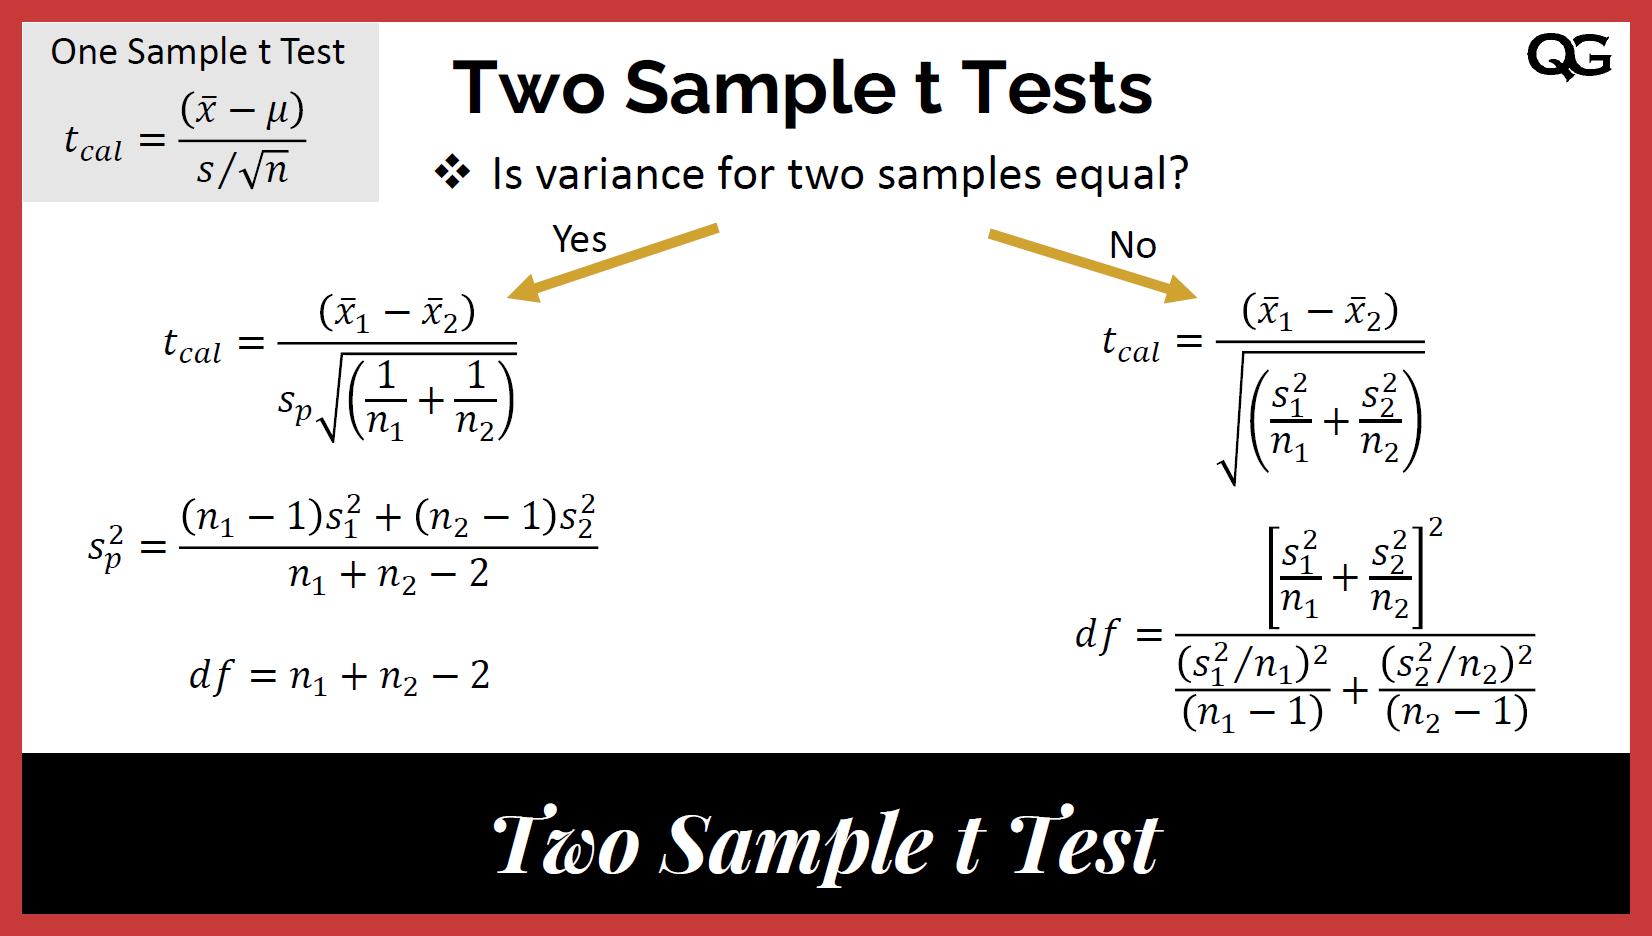

Fonte: https://www.qualitygurus.com/two-sample-t-test/

Como o teste de Levene indicou que a variância das duas amostras são iguais, então realizamos o teste T considerando que a variância das amostras são iguais. No Python, podemos realizar este teste da seguinte maneira:

In [30]:
# H0: médias iguais
# H1: médias diferentes
stats.ttest_ind(counts2010, counts2013, equal_var=True)

TtestResult(statistic=-1.6793067505298138, pvalue=0.09352136112081307, df=728.0)

Se as variâncias fossem diferentes, bastaria passar o parâmetro equal_var para False:

In [31]:
# H0: médias iguais
# H1: médias diferentes
stats.ttest_ind(counts2010, counts2013, equal_var=False)

TtestResult(statistic=-1.6793067505298138, pvalue=0.09352301646598069, df=725.2020442734665)

## Referência

Freire SM, Bioestatística Básica (http://www.lampada.uerj.br/arquivosdb/_book/comparacaoMedias.html)

Portal Action,  TESTE PARA COMPARAÇÃO DE DUAS MÉDIAS (TESTE T) (http://www.portalaction.com.br/inferencia/57-teste-para-comparacao-de-duas-medias-teste-t)

Introduction to Hypothesis Testing in R – Learn every concept from Scratch! (https://data-flair.training/blogs/hypothesis-testing-in-r/)

R tutorial, Inference About Two Populations (https://www.r-tutor.com/elementary-statistics/inference-about-two-populations)

